# 4.10 Coding Etiquette & Excel Reporting

## Importing Libraries

### This script contains the following points

#### Importing pkl file
#### Security implications, PII 
#### Create regional segmentation based on the State column
#### Create exclusion flag for low-activity customers
#### Customer Profiling
#### Distribution of Profiles


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Large Files'

In [5]:
path

'C:\\Large Files'

In [6]:
#Import orders_products_customers_merged.pkl from Prepared Data folder
ords_prods_cust = pd.read_pickle(os.path.join(path, 'orders_products_customers_merged.pkl'))

In [7]:
#look at the first five rows
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,Date_joined,Num_deps,Marital_status,income,_merge,Region,low_activity,Age_flag,income_flag,Num_deps_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants


# Security implications, Personally identifiable information (PII)

There are first and last name columns in this dataframe. We'll drop these columns. 

In [10]:
#verifying dropped columns worked
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,Date_joined,Num_deps,Marital_status,income,_merge,Region,low_activity,Age_flag,income_flag,Num_deps_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants


In [11]:
ords_prods_cust.shape

(32404859, 37)

In [12]:
ords_prods_cust.describe()

,product_id,aisle_id,department_id,prices,order_number,orders_day_of_week,orders_time_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_spend,customer_frequency,Age,Num_deps,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,2.559866e+04,7.119612e+01,9.919792e+00,1.198023e+01,1.714230e+01,2.738867e+00,1.342515e+01,1.110477e+01,8.352547e+00,5.895873e-01,3.305217e+01,1.198023e+01,1.002895e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,1.408400e+04,3.821139e+01,6.281485e+00,4.956554e+02,1.753532e+01,2.090077e+00,4.246380e+00,8.493183e+00,7.127071e+00,4.919087e-01,2.515525e+01,8.324227e+01,6.324929e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,2.530200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254023e+00,1.200000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# I looked at this and saw an outlier in prices, but due to the fact the df is so large, I've left it

# Create regional segmentation based on the State column

In [14]:
# defining the function to segment the State column into different regions

def region_label(row):
    if row['State'] in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        return 'Northeast'
    elif row['State'] in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        return 'Midwest'
    elif row['State'] in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        return 'South'
    elif row['State'] in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        return 'West'
    else:
        return 'NA'

In [15]:
#creating Region column
ords_prods_cust['Region'] = ords_prods_cust.apply(region_label, axis=1)

In [16]:
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,Date_joined,Num_deps,Marital_status,income,_merge,Region,low_activity,Age_flag,income_flag,Num_deps_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants


In [17]:
ords_prods_cust['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [18]:
#creating a crosstab for spending flag
crosstab = pd.crosstab(ords_prods_cust['spender_flag'], ords_prods_cust['Region'], dropna = False)

In [19]:
crosstab

Region,Midwest,Northeast,South,West
spender_flag,,,,
high_spender,155975,108225,209691,160354
low_spender,7441350,5614511,10582194,8132559


In [20]:
#saving this crosstab to Excel
crosstab.to_clipboard()

# Create exclusion flag for low-activity customers

In [22]:
#exclusion flag for customers with < 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'low_activity'] = 'True'

In [23]:
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'low_activity'] = 'False'

In [24]:
ords_prods_cust['low_activity'].value_counts()

low_activity
False    30964564
True      1440295
Name: count, dtype: int64

In [25]:
#exclusion flagged
df_exclusion = ords_prods_cust[ords_prods_cust['low_activity']== 'False']

In [26]:
#verifying result
len(df_exclusion)

30964564

In [27]:
#export as pickle to Prepared Data
df_exclusion.to_pickle(os.path.join(path, 'regular_cust.pkl'))

# Customer profiling

In [29]:
#Creating an Age_flag
ords_prods_cust.loc[(ords_prods_cust['Age'] >= 18) & (ords_prods_cust['Age'] <= 25), 'Age_flag'] = 'Young Adult'

In [30]:
ords_prods_cust.loc[(ords_prods_cust['Age'] >= 26) & (ords_prods_cust['Age'] <= 55), 'Age_flag'] = 'Adult'

In [31]:
ords_prods_cust.loc[(ords_prods_cust['Age'] >= 56) & (ords_prods_cust['Age'] <= 90), 'Age_flag'] = 'Senior'

In [32]:
ords_prods_cust['Age_flag'].value_counts(dropna = False)

Age_flag
Adult          15267510
Senior         13092160
Young Adult     4045189
Name: count, dtype: int64

In [33]:
#Creating an income_flag
ords_prods_cust.loc[ords_prods_cust['income'] < 50000, 'income_flag'] = 'Low Income'

In [34]:
ords_prods_cust.loc[(ords_prods_cust['income'] >= 50000) & (ords_prods_cust['income'] < 750000), 'income_flag'] = 'Medium Low Income'

In [35]:
ords_prods_cust.loc[(ords_prods_cust['income'] >= 75000) & (ords_prods_cust['income'] < 100000), 'income_flag'] = 'Medium Income'

In [36]:
ords_prods_cust.loc[(ords_prods_cust['income'] >= 100000) & (ords_prods_cust['income'] < 125000), 'income_flag'] = 'Medium High Income'

In [37]:
ords_prods_cust.loc[ords_prods_cust['income'] > 150000, 'income_flag'] = 'High Income'

In [38]:
ords_prods_cust['income_flag'].value_counts(dropna = False)

income_flag
Medium Low Income     11428800
Medium Income          7147327
Medium High Income     6183809
High Income            4050840
Low Income             3594083
Name: count, dtype: int64

In [39]:
#creating flag for living with or without dependants
ords_prods_cust.loc[ords_prods_cust['Num_deps'] == 0, 'Num_deps_flag'] = 'No Dependants'

In [40]:
ords_prods_cust.loc[ords_prods_cust['Num_deps'] > 0, 'Num_deps_flag'] = 'With Dependants'

In [41]:
ords_prods_cust['Num_deps_flag'].value_counts(dropna = False)

Num_deps_flag
With Dependants    24307356
No Dependants       8097503
Name: count, dtype: int64

In [42]:
#checking for newly created flag columns
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,...,Date_joined,Num_deps,Marital_status,income,_merge,Region,low_activity,Age_flag,income_flag,Num_deps_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,both,Midwest,False,Senior,Low Income,With Dependants


# Distribution of Profiles

In [44]:
path2 = r'C:\Users\melan\OneDrive\Career Foundry\04 2024 Instacart Basket Analysis'

In [45]:
path2

'C:\\Users\\melan\\OneDrive\\Career Foundry\\04 2024 Instacart Basket Analysis'

In [46]:
#creating a pie chart for age groups
age_group_counts = ords_prods_cust['Age_flag'].value_counts(sort=False)

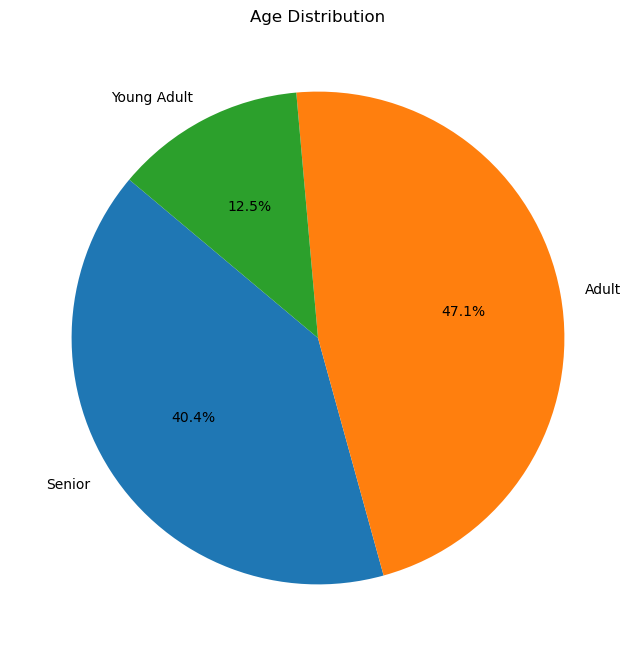

In [47]:
#creating a pie chart for age groups
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'piechart_age_distribution.png'))
plt.show()

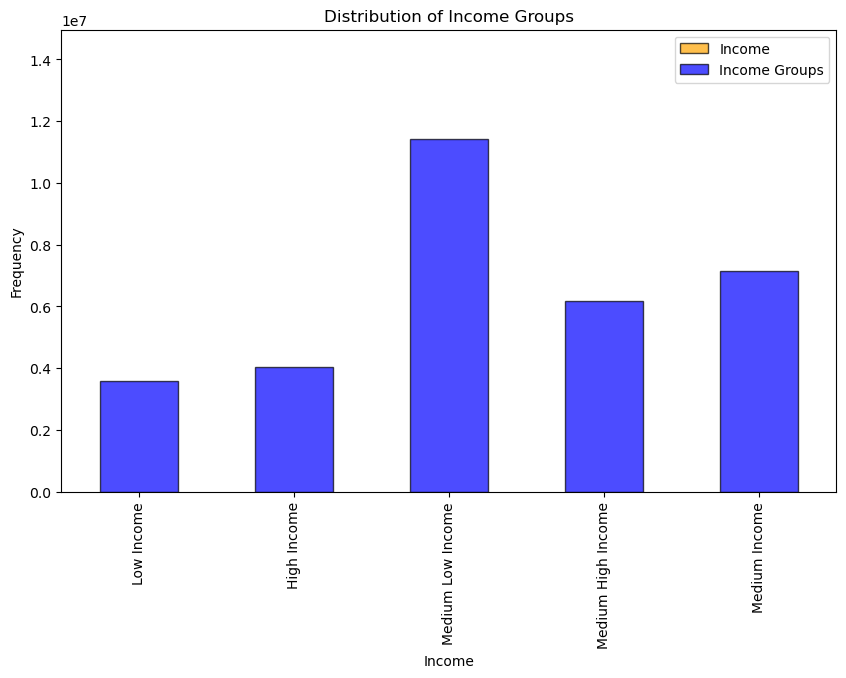

In [48]:
#creating histogram for income
plt.figure(figsize=(10,6))
plt.hist(ords_prods_cust['income'], bins=10, alpha=0.7, label='Income', color='orange', edgecolor='black')
income_group_counts = ords_prods_cust['income_flag'].value_counts(sort=False)
income_group_counts.plot(kind='bar', alpha=0.7, label='Income Groups', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income Groups')
plt.legend()
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'histogram_income.png'), bbox_inches = 'tight')
# Show plot
plt.show()

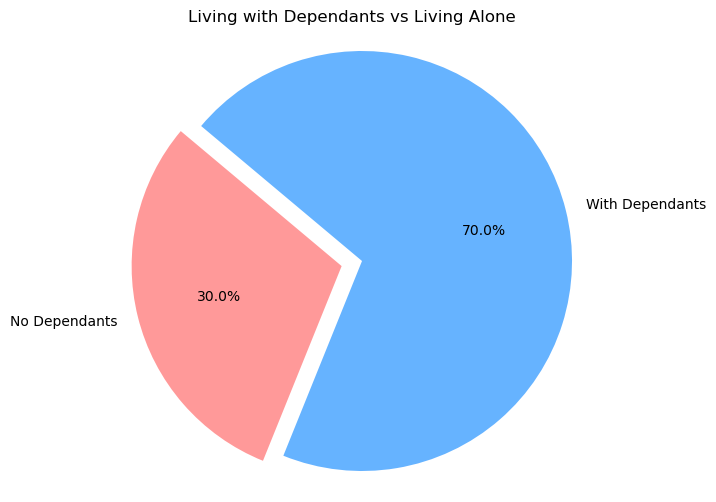

In [49]:
#create pie chart showing Living situation

labels = ['No Dependants', 'With Dependants']
sizes = [30, 70]  # Example percentages (sums to 100%)
colors = ['#ff9999','#66b3ff']  # Colors for each section
explode = (0.1, 0)  # Explode 1st slice (With Dependents)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Living with Dependants vs Living Alone')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'piechart_dependants.png'))
plt.show()


In [50]:
#export to Large Files
ords_prods_cust.to_pickle(os.path.join(path, 'orders_products_customers_merged.pkl'))